final project
===

due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 1: EEG experiment with psychopaths

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7790284/

### Description

Balancing the brain of offenders with psychopathy? Resting state EEG and electrodermal activity after a pilot study of brain self-regulation training

#### Purpose

Sheding light on brain plasticity of offenders with psychopathy. Previous study demonstrated successful brain self-regulation with SCP (slow-cortical potential) neurofeedback. 

#### Background 
Psychopaths have excessive slow-wave band activity (which is 1-8Hz, temporal or parietal regions, theta and delta). This is linked to decreased arousal, elevated anger, aggressiveness, violence (e.g. antisocial personality). 
For EEG measures, psychopaths had been found to show decreased alpha frequency power (which is 8- 12 Hz) at midline, parietal, and temporal regions. This was linked to shallow affect, failure to take responsibility for own actions, inhibition and also alpha frequency represents long-range communication between different brain regions.
	Skin conductance in psychopaths: reduced at rest, in anticipation of aversion or as reaction to stimulus.

#### Hypotheses

central nervous and autonomic peripheral changes after self-regulation of brain activity.
EEG slowing in psychopaths, reduced amount of alpha frequency. 
Changes in EEG before and after SCP-neurofeedback training at temporal parietal and midline areas. Those changes would be: slow frequency overrepresentation decreased, alpha freq. increased
Expected increase in skin resistance during brain regulation trials requiring a reduction of cortical activity(positivitytrials),while a decrease in skin resistance during brain regulation trials requiring an increase of cortical activity(negativity trials) was expected.
Lastly,we investigated the relationships between cortical and peripheral changes and changes in subjective self-reports (e.g.,aggression,empathy,behavioralapproach).

#### Methods and Materials
14 male patients mean age 43.14

##### Pre study (Day 1-7)

Hares-Psychopathy-Checklist-Revised (PCL-R) for measuring psychopathy:
Includes: Interpersonal Facet+Affective Facet(most important F1), Lifestyle Facet+Antisocial Behavior Facet(F2), 20 items
Inclusion for study was PCL-R above 26

##### Resting state EEG pre Neurofeedback (Day 1-7)
For cortical and peripheral data. 
8 1-minute trials per participant: four with eyes open(O) 4 closed (C) order: COCO- Break- OCOC
Total 8 mins EEG pre treatment

##### Brain self – regulation with slow cortical potential neurofeedback (Days 8-19. Then break, then 33-45 trainings again)

25 EEG slowpot. Training sessions per participant: SCPs recorded at fronto-central regions and fed back via moving avatar to feedback monitor of participants. 
At beginnings of trials intended direction of SCP shifts was indicated by pointing of a triangle: Pos(inhibition of cortical activation triangle pointing downwards)/Neg(increase of cortical activation, triangle pointing upwards ) SCP shifts were expected from participants. 
In active regulation the avatar moved upwards for increased activation and downwards for decreased activation. 

$\to$ Task was to learn volitional control of SCPs to move avatar

Each training session consisted of feedback block 1, transfer block ( no feedback, just reward) and feedback block 2

##### Electrodermal activity assessed during training sessions (Days 8-19. Then break, then 33-45 measurments again)
Recorded as skin resistance

##### Resting state EEG post
For cortical and peripheral data. 
8 1-minute trials per participant: four with eyes open(O) 4 closed (C) order: COCO- Break- OCOC
Total 8 mins EEG pre treatment




#### Results 
Central nervous system: suppression of psychopathic overrepresentation of slow frequency bands (theta and delta) after EEG SCP neurofeedback -> reduction of slow frequency delta and theta bands
Also increase in alpha band activity 
Electrodermal activity changed accordingly
These results indicate learning process and plasticity in neural and peripheral structures of psychopathic offenders.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


file = 'data/final_data/auc_ec_eo_with_gamma.csv'

df = pd.read_csv(file, sep=";", index_col=0)

df.head()

,Factor,Power,Time,ROI,Frequency,Eyes
id,,,,,,
1,GAMMA_aucp_PRE_EC_midline,0.00390,Pre,Midline,Gamma,EC
2,GAMMA_aucp_PRE_EC_midline,0.00496,Pre,Midline,Gamma,EC
3,GAMMA_aucp_PRE_EC_midline,0.00612,Pre,Midline,Gamma,EC
4,GAMMA_aucp_PRE_EC_midline,0.01122,Pre,Midline,Gamma,EC
5,GAMMA_aucp_PRE_EC_midline,0.02378,Pre,Midline,Gamma,EC


## Distribution of EEG power across all conditions

### Plots

In order to use only libraries that were used in class we coded this in `matplotlib`. With the library `seaborn` we could have achieved the same with just a few lines of code. With `matplotlib` it is a bit tedious and violins look more like carrots (there seems no easy way to change that).

#### Example code with `seaborn`

```python

import seaborn as sns

g = sns.catplot(data=df,
                x="Time",
                y="Power",
                hue="Eyes",
                col="ROI",
                row="Frequency",
                palette=sns.color_palette(["steelblue", "goldenrod", "salmon", "firebrick"]),
                kind="violin", split=False, height=5, aspect=1.2, inner="quartile",
                sharey=False)
sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0), fontsize=12, ncol=2)
plt.tight_layout()

```

#### Plot coded in `matplotlib`

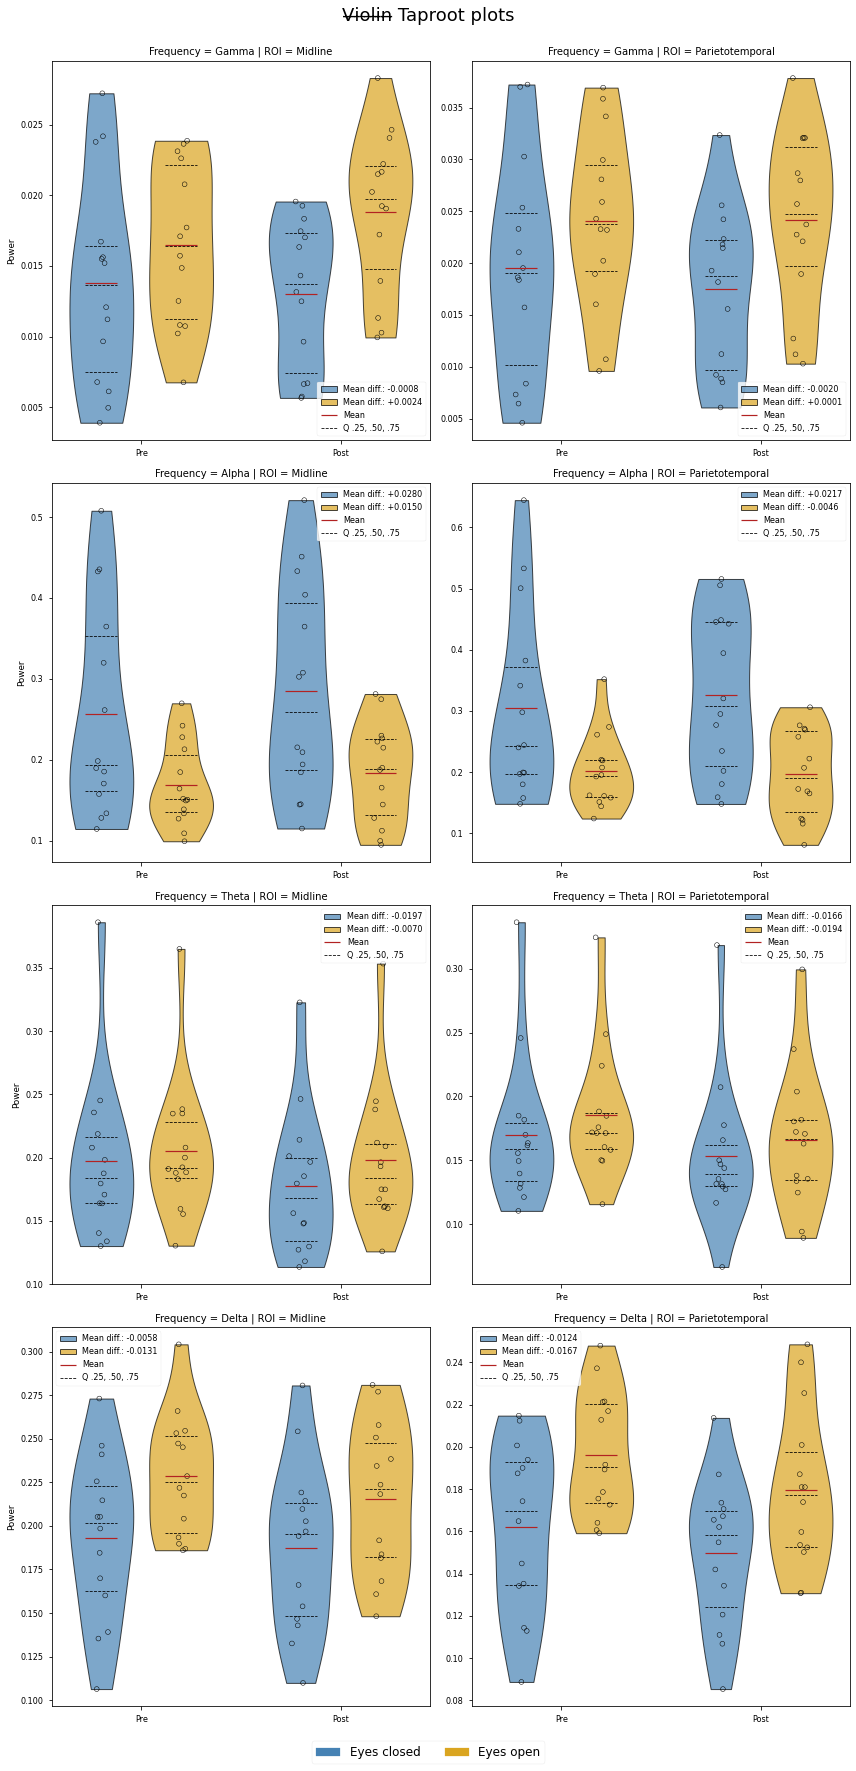

In [232]:
plt.style.use('seaborn-paper')

from scipy.stats import kde

violin_times = df.Time.unique()
violin_rois = df.ROI.unique()
violin_eyes = ["EC", "EO"]
violin_frequencies = df.Frequency.unique()

fig, axs = plt.subplots(4, 2, figsize=(12, 24))

for i_roi, violin_roi in enumerate(violin_rois):
    for i_freq, violin_freq in enumerate(violin_frequencies):
        for i_time, violin_time in enumerate(violin_times):

            violin_data = df.loc[
                (df["ROI"]==violin_roi) &
                (df["Frequency"]==violin_freq),
                ["Eyes", "Time", "Power"]].reset_index().pivot(index=["id", "Time"], columns="Eyes", values="Power").reset_index()

            vp = axs[i_freq][i_roi].violinplot(
                violin_data.loc[violin_data["Time"] == violin_time, violin_eyes],
                positions=[2.5*i_time, 2.5*i_time+1],
                vert=True,
                widths=.8,
                showextrema=False,
                showmedians=False,
                showmeans=True,
                bw_method="scott",
                quantiles=[[.25, .5, .75], [.25, .5, .75]],
            )


            for violin_bodies in vp['bodies']:
                violin_bodies.set_edgecolor("black")
                violin_bodies.set_linewidth(1)
                violin_bodies.set_alpha(.7)


            vp["bodies"][0].set_facecolor("steelblue")
            vp["bodies"][1].set_facecolor("goldenrod")
            vp["cquantiles"].set_linewidth([.8, .8, .8])
            vp["cquantiles"].set_edgecolors(["black", "black", "black"])
            vp["cmeans"].set_linewidth(1.2)
            vp["cmeans"].set_edgecolor("firebrick")
            vp["cquantiles"].set_linestyle(["dashed", "dashed","dashed"])
            vp["cquantiles"].set_rasterized(10)
            
            violin_label = violin_data.drop("id", axis=1).melt(id_vars=["Time"], value_name="Power").groupby(["Time", "Eyes"]).mean()
            mean_diff_ec = violin_label.loc[("Post", "EC"), "Power"] - violin_label.loc[("Pre", "EC"), "Power"]
            mean_diff_eo = violin_label.loc[("Post", "EO"), "Power"] - violin_label.loc[("Pre", "EO"), "Power"]
            
            if i_time == 0:
                vp["bodies"][0].set_label(f"Mean diff.: {mean_diff_ec:+.4f}")
                vp["bodies"][1].set_label(f"Mean diff.: {mean_diff_eo:+.4f}")
                vp["cmeans"].set_label("Mean")
                vp["cquantiles"].set_label("Q .25, .50, .75")

            scatter = axs[i_freq][i_roi].scatter(
                [(2.5*i_time+np.random.normal(0,.05)) for i in range(int(len(violin_data)/2))],
                violin_data.loc[violin_data["Time"] == violin_time, "EC"],
                marker="o",
                color="none",
                s=23,
                edgecolors="black",
                linewidths=.5
                                                 
            )
            scatter = axs[i_freq][i_roi].scatter(
                [(2.5*i_time+1+np.random.normal(0,.05)) for i in range(int(len(violin_data)/2))],
                violin_data.loc[violin_data["Time"] == violin_time, "EO"],
                marker="o",
                color="none",
                s=23,
                edgecolors="black",
                linewidths=.5,
            )

            
        axs[i_freq][i_roi].set_title(f"Frequency = {violin_freq} | ROI = {violin_roi}", fontsize=10)
        axs[i_freq][i_roi].set_xticks([0.5, 3], violin_times)
        axs[i_freq][0].set_ylabel("Power")
        axs[i_freq][i_roi].legend()


# Labels to use in the legend for each line
labels = ["in 2019", "in 2020"]

# Title for subplots
fig.suptitle('\u0336'.join("Violin") + '\u0336' +' Taproot plots', fontsize=18, y=1)

import matplotlib.patches as mpatches

l1 = mpatches.Patch(color='steelblue', label='Eyes closed')
l2 = mpatches.Patch(color='goldenrod', label='Eyes open')

fig.legend(handles=[l1, l2], loc="upper center", bbox_to_anchor=(0.5, 0), fontsize=12, ncol=2)
        
plt.tight_layout()

<div class="alert alert-warning">Maybe someone has an idea how to get real violins without cutting the ends. And maybe also how to extend the quantile lines ...</div>

#### Summary table distributions

In [3]:
df_grp = df.groupby(["Time", "ROI", "Frequency", "Eyes"]).mean().reset_index()
df_grp = df_grp.pivot(index=["ROI", "Frequency", "Eyes"], columns="Time", values="Power").reset_index()
df_grp = df_grp.reindex(columns=["ROI", "Frequency", "Eyes", "Pre", "Post"])
df_grp["Diff"] = df_grp["Post"] - df_grp["Pre"]
df_grp

Time,ROI,Frequency,Eyes,Pre,Post,Diff
0,Midline,Alpha,EC,0.257031,0.285041,0.028010
1,Midline,Alpha,EO,0.168580,0.183617,0.015037
2,Midline,Delta,EC,0.193173,0.187387,-0.005786
3,Midline,Delta,EO,0.228416,0.215366,-0.013050
4,Midline,Gamma,EC,0.013781,0.013026,-0.000756
5,Midline,Gamma,EO,0.016463,0.018830,0.002367
6,Midline,Theta,EC,0.197239,0.177586,-0.019653
7,Midline,Theta,EO,0.204900,0.197930,-0.006970
8,Parietotemporal,Alpha,EC,0.304755,0.326416,0.021661
9,Parietotemporal,Alpha,EO,0.201677,0.197118,-0.004559


## Testing for mean difference between Pre and Post

### $t$-test

In [8]:
from pingouin import ttest

def get_ttest(df, conditions=None, paired=True, alternative='two-sided', correction='auto', r=0.707, conf=0.95):
    pre, post = df.loc[df["Time"]=="Pre"], df.loc[df["Time"]=="Post"]
    if conditions != None:
        if type(conditions) != dict:
            raise Exception("Condition argument needs to be a dict!")
        for c in conditions:
            pre = pre.loc[pre[c]==conditions[c]]
            post = post.loc[post[c]==conditions[c]]
    tt_res = ttest(pre["Power"], post["Power"], paired=paired, alternative=alternative, correction=correction, r=r, confidence=conf)
    return tt_res

#### Overall

In [71]:
tt_res_overall = get_ttest(df)
tt_res_overall["BF10"] = tt_res_overall["BF10"].astype(float)
tt_res_overall["BF01"] = 1/tt_res_overall["BF10"]
tt_res_overall

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,BF01
T-test,1.374195,223,two-sided,0.170761,"[-0.0, 0.01]",0.029173,0.189,0.071919,5.291005


#### Interpretation of effect

$t$-test $p$-value: Effect ist not significant.  
Bayes-factor: Moderate evidence for absence of effect ($H_0$).

#### The 16 conditions

In [10]:
freq_s = ["Alpha", "Delta", "Gamma", "Theta"]
roi_s = ["Midline", "Parietotemporal"]
eyes_s = ["EO", "EC"]

tt_res = None
for freq in freq_s:
    for roi in roi_s:
        for eyes in eyes_s:
            tmp = get_ttest(df, conditions = {"Frequency":freq, "ROI":roi, "Eyes":eyes})
            tmp["Frequency"] = freq
            tmp["ROI"] = roi
            tmp["Eyes"] = eyes
            if type(tt_res) != pd.core.frame.DataFrame:
                tt_res = tmp
            else:
                tt_res = pd.concat([tt_res, tmp], sort=False).reset_index(drop=True)
tt_res = tt_res.set_index(["Frequency", "ROI", "Eyes"])
tt_res["BF10"] = tt_res["BF10"].astype(float)
tt_res["BF01"] = 1/tt_res["BF10"]
tt_res

T  dof alternative     p-val  \
Frequency ROI             Eyes                                        
Alpha     Midline         EO   -1.809307   13   two-sided  0.093576   
                          EC   -2.332492   13   two-sided  0.036394   
          Parietotemporal EO    0.365916   13   two-sided  0.720313   
                          EC   -1.103179   13   two-sided  0.289953   
Delta     Midline         EO    1.854440   13   two-sided  0.086495   
                          EC    1.021372   13   two-sided  0.325710   
          Parietotemporal EO    3.343845   13   two-sided  0.005283   
                          EC    2.249236   13   two-sided  0.042467   
Gamma     Midline         EO   -2.623542   13   two-sided  0.021044   
                          EC    0.887494   13   two-sided  0.390937   
          Parietotemporal EO   -0.050161   13   two-sided  0.960757   
                          EC    1.396356   13   two-sided  0.185994   
Theta     Midline         EO    0.735827   13   two-sided  0.474904   
                          EC    1.681222   13   two-sided  0.116572   
          Parietotemporal EO    2.544199   13   two-sided  0.024460   
                          EC    2.498032   13   two-sided  0.026688   

                                        CI95%   cohen-d   BF10     power  \
Frequency ROI             Eyes                                             
Alpha     Midline         EO     [-0.03, 0.0]  0.264700  0.981  0.150878   
                          EC    [-0.05, -0.0]  0.213482  2.014  0.114915   
          Parietotemporal EO    [-0.02, 0.03]  0.068266  0.286  0.056467   
                          EC    [-0.06, 0.02]  0.150212  0.451  0.081713   
Delta     Midline         EO     [-0.0, 0.03]  0.330338  1.040  0.208802   
                          EC    [-0.01, 0.02]  0.121707  0.421  0.070710   
          Parietotemporal EO     [0.01, 0.03]  0.492474  9.613  0.400174   
                          EC      [0.0, 0.02]  0.329338  1.786  0.207823   
Gamma     Midline         EO     [-0.0, -0.0]  0.416427  3.107  0.303249   
                          EC      [-0.0, 0.0]  0.117639  0.378  0.069335   
          Parietotemporal EO      [-0.0, 0.0]  0.008794  0.270  0.050107   
                          EC     [-0.0, 0.01]  0.219019  0.603  0.118409   
Theta     Midline         EO    [-0.01, 0.03]  0.125879  0.341  0.072170   
                          EC    [-0.01, 0.04]  0.320145  0.836  0.198958   
          Parietotemporal EO      [0.0, 0.04]  0.361114  2.756  0.240328   
                          EC      [0.0, 0.03]  0.286544  2.571  0.168700   

                                    BF01  
Frequency ROI             Eyes            
Alpha     Midline         EO    1.019368  
                          EC    0.496524  
          Parietotemporal EO    3.496503  
                          EC    2.217295  
Delta     Midline         EO    0.961538  
                          EC    2.375297  
          Parietotemporal EO    0.104026  
                          EC    0.559910  
Gamma     Midline         EO    0.321854  
                          EC    2.645503  
          Parietotemporal EO    3.703704  
                          EC    1.658375  
Theta     Midline         EO    2.932551  
                          EC    1.196172  
          Parietotemporal EO    0.362845  
                          EC    0.388954

#### Interpretation of effects

***p*-values**  

We see significant effects, but in the light of the low power (sample size of 14) it's probably not a good idea to interpret them. We probably need to manipulate only 1 participant's value to get fundamentally different *p* values.  

**Bayes factor analysis**

As cut off values we see a Bayes factor of > 3 as moderate and Bayes factors > 10 as strong evidence.

Found evidence for the following conditions:

Alpha, Parietemporal, Eyes open: Moderate evidence for the $H_0$.  
Delta, Parietemporal, Eyes open: Moderate to strong evidence for the $H_1$.  
Gamma, Midline, Eyes open: Moderate evidence for the $H_1$.  
Gamma, Parietemporal, Eyes open: Moderate evidence for the $H_0$.  


For all other conditions we did not find evidence.

### Permutation test

In [65]:
from scipy.stats import ttest_rel


def perm_test(arr_1, arr_2, n_repetitions=5000):
    """
    Permutation test.

    Parameters
    ----------
    arr_1 : array_like
        1st 1-dimensional array
    arr_2 : array_like
        2nd 1-dimensional array
    n_repetitions : int, optional
        Number of repetitions, by default 2000

    Returns
    -------
    p_val
        p-value of the permutation test
    """
    res = list()
    
    mean_diff = arr_1.mean() - arr_2.mean()
    
    for i in range(n_repetitions):
        arr_comb = np.concatenate((arr_1,arr_2))
        arr_perm = np.random.permutation(arr_comb) 
        arr_split_1 = arr_perm[0:int(len(arr_comb)/2)]
        arr_split_2 = arr_perm[int(len(arr_comb)/2):]
        mean_delta_perm = arr_split_1.mean() - arr_split_2.mean()
        res.append(mean_delta_perm)    

    p_val = np.sum(np.abs(res > np.abs(mean_diff))) / n_repetitions

    return p_val


def get_ptest(df, conditions=None):
    """
    Wrapper around perm_test() for more conditions. Includes comparison with paired t-test.
    
    """
    pre, post = df.loc[df["Time"]=="Pre"], df.loc[df["Time"]=="Post"]
    if conditions != None:
        if type(conditions) != dict:
            raise Exception("Condition argument needs to be a dict!")
        for c in conditions:
            pre = pre.loc[pre[c]==conditions[c]]
            post = post.loc[post[c]==conditions[c]]

    pre = pre.Power
    post = post.Power
    mean_diff = pre.mean() - post.mean()
    sd_pooled = np.sqrt((pre.std()**2 + post.std()**2)/2)
    cohens_d = mean_diff / sd_pooled
    p_val_perm = perm_test(pre, post)
    _,p_val_ttest = ttest_rel(pre, post)
    pt_res = pd.DataFrame([[len(pre), cohens_d, p_val_perm, p_val_ttest]], columns=["n", "cohen-d", "p-val permutation test", "p-val t-test"])
    
    return pt_res

#### Permutation test: Overall

In [66]:
get_ptest(df)

,n,cohen-d,p-val permutation test,p-val t-test
0,224,0.029173,0.3764,0.170761


#### Permutation test: The 16 conditions

In [67]:
pt_res = None

for freq in freq_s:
    for roi in roi_s:
        for eyes in eyes_s:
            tmp = get_ptest(df, conditions = {"Frequency":freq, "ROI":roi, "Eyes":eyes})
            tmp["Frequency"] = freq
            tmp["ROI"] = roi
            tmp["Eyes"] = eyes
            if type(pt_res) != pd.core.frame.DataFrame:
                pt_res = tmp
            else:
                pt_res = pd.concat([pt_res, tmp], sort=False).reset_index(drop=True)
pt_res = pt_res.set_index(["Frequency", "ROI", "Eyes"])
pt_res

n   cohen-d  p-val permutation test  \
Frequency ROI             Eyes                                         
Alpha     Midline         EO    14 -0.264700                  0.2480   
                          EC    14 -0.213482                  0.2768   
          Parietotemporal EO    14  0.068266                  0.4322   
                          EC    14 -0.150212                  0.3488   
Delta     Midline         EO    14  0.330338                  0.1936   
                          EC    14  0.121707                  0.3884   
          Parietotemporal EO    14  0.492474                  0.1018   
                          EC    14  0.329338                  0.1914   
Gamma     Midline         EO    14 -0.416427                  0.1324   
                          EC    14  0.117639                  0.3722   
          Parietotemporal EO    14 -0.008794                  0.4960   
                          EC    14  0.219019                  0.2766   
Theta     Midline         EO    14  0.125879                  0.3774   
                          EC    14  0.320145                  0.2138   
          Parietotemporal EO    14  0.361114                  0.1730   
                          EC    14  0.286544                  0.2366   

                                p-val t-test  
Frequency ROI             Eyes                
Alpha     Midline         EO        0.093576  
                          EC        0.036394  
          Parietotemporal EO        0.720313  
                          EC        0.289953  
Delta     Midline         EO        0.086495  
                          EC        0.325710  
          Parietotemporal EO        0.005283  
                          EC        0.042467  
Gamma     Midline         EO        0.021044  
                          EC        0.390937  
          Parietotemporal EO        0.960757  
                          EC        0.185994  
Theta     Midline         EO        0.474904  
                          EC        0.116572  
          Parietotemporal EO        0.024460  
                          EC        0.026688

The permutation test showed persistently higher $p$-values than the $t$-test yet none of them turned out significant (<.05). This suggests that the results are not too different from random.

### Power analysis

#### Classic

In [19]:
#
#
#

#### Simulation

<div class="alert alert-warning">Vielleicht können wir diesen R-Code nehmen und übersetzen.</div>

#### Create copy of data table with some additional variables for simulation
```r
df_pwr <- df

df_pwr$condition <- paste(df_pwr$targetValidity, df_pwr$cueType, sep = "_")

# Variablen initiieren
vpn <- NULL
i <- NULL
j <- NULL
df_pwr$RTnormalized <- 0 

for (i in 1:length(unique(df_pwr$sbj))) { # Loop über alle Personen
  vpn_temp <- unique(df_pwr$sbj)[i] 
  for (j in 1:length(unique(df_pwr$condition))) { # Loop über alle Bedingungen pro Person (deshalb genestet [Loop im Loop])
    condition_temp <- unique(df_pwr$condition)[j] 
    meanRT_temp <- mean(df_pwr[condition == condition_temp & sbj == vpn_temp]$reactionTime) # mittlere Reaktionszeit für diese Bedingung ermitteln
    df_pwr[condition == condition_temp & sbj == vpn_temp]$RTnormalized <- 
      df_pwr[condition == condition_temp & sbj == vpn_temp]$reactionTime - meanRT_temp # mittlere Reaktionszeit von den Reaktionszeiten abziehen
  }
}

# Um die Reaktionszeiten wieder realistischer bzwl. leichter interpretierbar zu machen, addieren wir den Mittelwert aller Reaktionzeiten. Die Form der Verteilung bleibt davon unbeeinflusst.
df_pwr$RTnormalized_real <- df_pwr$RTnormalized + mean(df_pwr$reactionTime)
```

#### Create template data table
```r
# copy from the real data used for the analysis
dt_template <- copy(df_pwr[, c("cueType", "targetValidity", "sbj")])

# remove non-existing levels
dt_template$sbj <- factor(dt_template$sbj, levels = (unique(dt_template$sbj)))

# change sbj to 1:end
levels(dt_template$sbj) <- c(1:length(unique(dt_template$sbj)))

```

#### Main function

```r
runSimulation <- function(dt_template, df, Nsim, effect, sampleSize, simSampleSize, trialChangeFactor){
    simList <- vector(mode = "list", length = Nsim)
    j <- NULL
    i <-  NULL
    for (j in 1:Nsim) {
      start.time <- Sys.time()
      simData <- copy(dt_template)
      if (simSampleSize < sampleSize) {
        randomSbj <- sample(1:length(unique(simData$sbj)), simSampleSize)
        simData <- simData[simData$sbj %in% randomSbj,]
        levels(simData$sbj)[levels(simData$sbj) %in% randomSbj] <- c(1:simSampleSize)
        } else if (simSampleSize > sampleSize) {
          sampleSizeIncrease <- simSampleSize - sampleSize
          if (sampleSizeIncrease <= sampleSize) {
            randomSbj <- sample(1:length(unique(simData$sbj)), sampleSizeIncrease)
            simDataAddition <- simData[simData$sbj %in% randomSbj,]
            simDataAddition$sbj <- factor(simDataAddition$sbj, levels = (unique(simDataAddition$sbj)))
            levels(simDataAddition$sbj) <- c((sampleSize+1):(sampleSize+sampleSizeIncrease))
            simData <- rbind(simData, simDataAddition)
          } else if (sampleSizeIncrease > sampleSize) {
            simRepetition <- floor(simSampleSize / sampleSize)
            simDataBase <- simData[rep(seq_len(nrow(simData)), times = simRepetition), ]
            simDataBase$repetition <- rep(1:simRepetition, each = nrow(simData))
            simDataBase$sbj_new <- as.numeric(simDataBase$sbj)
            simDataBase$sbj_new <- simDataBase$sbj_new + sampleSize * (simDataBase$repetition-1)
            simDataBase$sbj <- as.factor(simDataBase$sbj_new)
            simDataBase$repetition <- NULL
            simDataBase$sbj_new <- NULL
            randomSbj <- sample(1:length(unique(simData$sbj)), simSampleSize %% sampleSize)
            simDataAddition <- simData[simData$sbj %in% randomSbj,]
            simDataAddition$sbj <- factor(simDataAddition$sbj, levels = (unique(simDataAddition$sbj)))
            levels(simDataAddition$sbj) <-
            c((length(unique(simDataBase$sbj))+1):(sampleSize+sampleSizeIncrease))
            simData <- rbind(simDataBase, simDataAddition)
          }
        }

      if (trialChangeFactor < 1) {
        simData <- simData[sample(1:nrow(simData), round(nrow(simData) * trialChangeFactor))]
      } else if (trialChangeFactor > 1) {
        simData <- rbind(simData[rep(seq_len(nrow(simData)), times = floor(trialChangeFactor)), ],
                         simData[sample(1:nrow(simData), round(nrow(simData) * (trialChangeFactor-floor(trialChangeFactor))))])
      }

      for (i in 1:simSampleSize) {
        # simulates random interindividual variance
        individualRTvariance <-  rnorm(1, mean = 0, sd = 0.05)
        RT_var_sd <- 0.015
        RT_var1 <- rnorm(1, mean = 0, sd = RT_var_sd)
        RT_var2 <- rnorm(1, mean = 0, sd = RT_var_sd)
        RT_var3 <- rnorm(1, mean = 0, sd = RT_var_sd)
        RT_var4 <- rnorm(1, mean = 0, sd = RT_var_sd)
        RT_var5 <- rnorm(1, mean = 0, sd = RT_var_sd)
        RT_var6 <- rnorm(1, mean = 0, sd = RT_var_sd)

        # simulate reaction times per condition
        RT_1 <- sample(df$RTnormalized_real - effect + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "valid" & cueType == "match"]),
                       replace = TRUE) + RT_var1
        RT_2 <- sample(df$RTnormalized_real + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "valid" & cueType == "non-match"]),
                       replace = TRUE) + RT_var2
        RT_3 <- sample(df$RTnormalized_real + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "invalid" & cueType == "match"]),
                       replace = TRUE) + RT_var3
        RT_4 <- sample(df$RTnormalized_real + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "invalid" & cueType == "non-match"]),
                       replace = TRUE) + RT_var4
        RT_5 <- sample(df$RTnormalized_real + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "valid" & cueType == "inhibition"]),
                       replace = TRUE) + RT_var5
        RT_6 <- sample(df$RTnormalized_real + individualRTvariance,
                       nrow(simData[sbj == i & targetValidity == "invalid" & cueType == "inhibition"]),
                       replace = TRUE) + RT_var6

        # Zuordnung der simulierten Reaktionszeiten zu den Faktorkombinationen
        simData[sbj == i & targetValidity == "valid" & cueType == "match", reactionTime := RT_1]
        simData[sbj == i & targetValidity == "valid" & cueType == "non-match", reactionTime := RT_2]
        simData[sbj == i & targetValidity == "invalid" & cueType == "match", reactionTime := RT_3]
        simData[sbj == i & targetValidity == "invalid" & cueType == "non-match", reactionTime := RT_4]
        simData[sbj == i & targetValidity == "valid" & cueType == "inhibition", reactionTime := RT_5]
        simData[sbj == i & targetValidity == "invalid" & cueType == "inhibition", reactionTime := RT_6]
      }

      simData[, simNo := j] # ergänzt neue Variable mit der Nummer der Simulation
      simList[[j]] <- copy(simData) # speichert das fertige simulierte Datenframe in die Liste mit den Simulationen
      end.time <- Sys.time() # End-Zeit der Simulation eines Datensatzes
      time.taken <- end.time - start.time # Dauer der Simulation eines Datensatzes
    }

    simData <- rbindlist(simList)

    # Zuletzt vergleichen wir noch die Standardabweichungen der Reaktionzeiten in den Bedingungen der realen und simulierten Daten
    data_trimmed_means_sbj <- df[, .(meanRT = mean(reactionTime)),
                                           by = .(sbj, cueType, targetValidity)]

    data_trimmed_sd <- data_trimmed_means_sbj[, .(SD = sd(meanRT)), by = .(targetValidity, cueType)]

    simData_trimmed_means_sbj <- simData[, .(meanRT = mean(reactionTime)),
                                         by = .(sbj, targetValidity, cueType, simNo)]

    simData_trimmed_sd_sim <- simData_trimmed_means_sbj[, .(SD = sd(meanRT)),
                                                        by = .(targetValidity, cueType, simNo)]

    simData_trimmed_sd <- simData_trimmed_sd_sim[, .(SD = mean(SD)),
                                                 by = .(targetValidity, cueType)]

    # Berechnung des Validitätseffeks
    simData_means_sbj <- simData[, .(meanRT = mean(reactionTime)),
                                 by = .(simNo, targetValidity, cueType, sbj)]

    simValidityEffect <- simData_means_sbj[, .(validityEffect = meanRT[targetValidity == "invalid"] -
                                                                meanRT[targetValidity == "valid"]),
                                           by = .(cueType, sbj, simNo)]
    # Ergebnisse berechnen
    simValidityEffect_results <- simValidityEffect[,
                                     .(meanValidityEffect = t.test(validityEffect, mu = 0)$estimate,
                                       p.value = t.test(validityEffect, mu = 0)$p.value,
                                       t.stat = t.test(validityEffect, mu = 0)$statistic),
                                     by = .(simNo, cueType)]

    sigNiveau <- 0.05 # Signifikanzniveau definieren

    powerResults <- simValidityEffect_results[t.stat > 0 & p.value < sigNiveau,
                                              .(EffectFound = .N,
                                                Nsim = max(simValidityEffect_results$simNo),
                                                testPower = .N / max(simValidityEffect_results$simNo)),
                                              by = .(cueType)]

    return(powerResults)}

```

#### Determine power

```r
condition <- "match"

n_sims <- 1000
effect_est <- 20 # 20 ms validity effect (smallest relevant effect size)
sim_sample_size <- sample_size # sample size for simulation (can be changed!)
trial_change_factor <- 1 # change factor for trial number to increase or decrease trial number

res <- runSimulation(dt_template, df_pwr, n_sims, effect_est, sample_size, sim_sample_size, trial_change_factor)
pwr <- res[res$cueType==condition, ]$testPower

cat(
    "A power analysis based on ", 
    n_sims, " simulations yielded a power of ", 
    pwr, " to find a validity effect of ", 
    effect_est, " ms in the condition positive instruction and ", 
    condition, " with the sample size of ", sample_size, " participants.",
    sep=""
)


```

### Further Bayesian analyses ...

... only if necessary!

See examples here

* https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html
* https://psycnet.apa.org/record/2012-18082-001
* https://www.sumsar.net/best_online/